In [1]:
import pandas as pd
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.columns
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [7]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [10]:
# Filter for specific countries
countries_of_interest = ['Kenya', 'United States', 'China', 'India', 'Canada']
filtered_df = df[df['location'].isin(countries_of_interest)]
print(filtered_df)


       iso_code      continent       location        date  total_cases  \
63626       CAN  North America         Canada  2020-01-05          0.0   
63627       CAN  North America         Canada  2020-01-06          0.0   
63628       CAN  North America         Canada  2020-01-07          0.0   
63629       CAN  North America         Canada  2020-01-08          0.0   
63630       CAN  North America         Canada  2020-01-09          0.0   
...         ...            ...            ...         ...          ...   
405120      USA  North America  United States  2024-07-31  103436829.0   
405121      USA  North America  United States  2024-08-01  103436829.0   
405122      USA  North America  United States  2024-08-02  103436829.0   
405123      USA  North America  United States  2024-08-03  103436829.0   
405124      USA  North America  United States  2024-08-04  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
63626         0.0                 NaN       

In [15]:
# Drop rows with missing data
filtered = df[df['location'].notna()]
clean_df = filtered.dropna()
clean_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [16]:
# Convert date to datetime
filtered ['date'] = pd.to_datetime(filtered['date'])
print(filtered.dtypes)

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                          int64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object


In [18]:
# Handle missing numerical values
filtered['total_cases'].fillna(filtered['total_cases'].mean(),inplace=True)

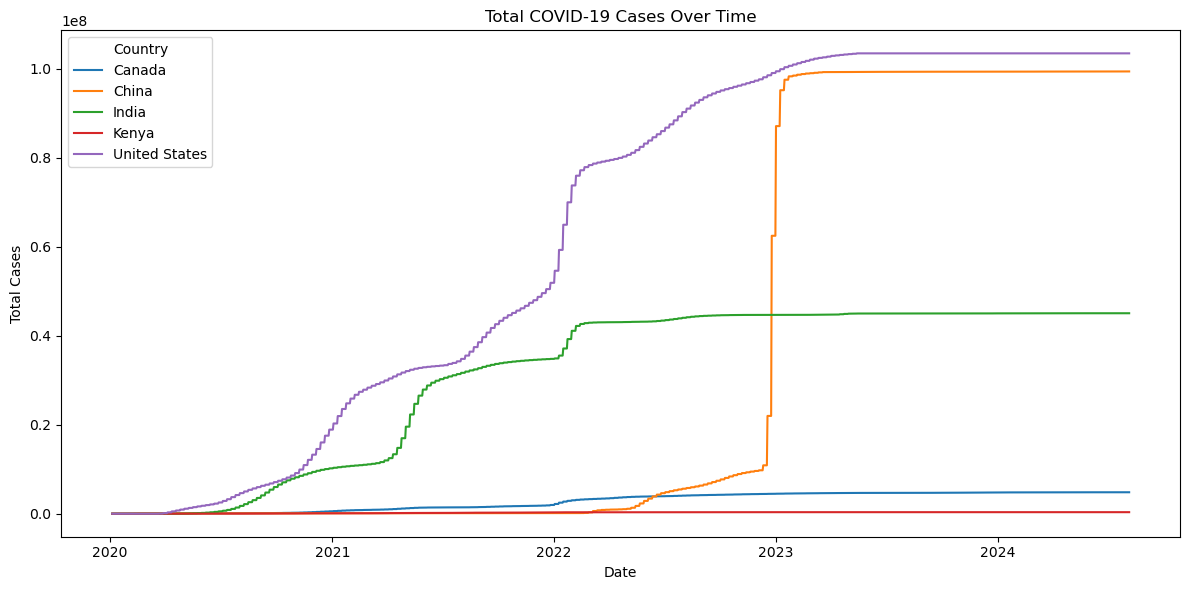

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date']=pd.to_datetime(df['date'])

# Filter selected countries
countries = ['Kenya', 'United States', 'China', 'India', 'Canada']
filtered = df[df['location'].isin(countries)]

# Drop missing values in total_cases
filtered = filtered.dropna(subset=['total_cases'])

# Plot with Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x='date', y='total_cases', hue='location')

# Add labels
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

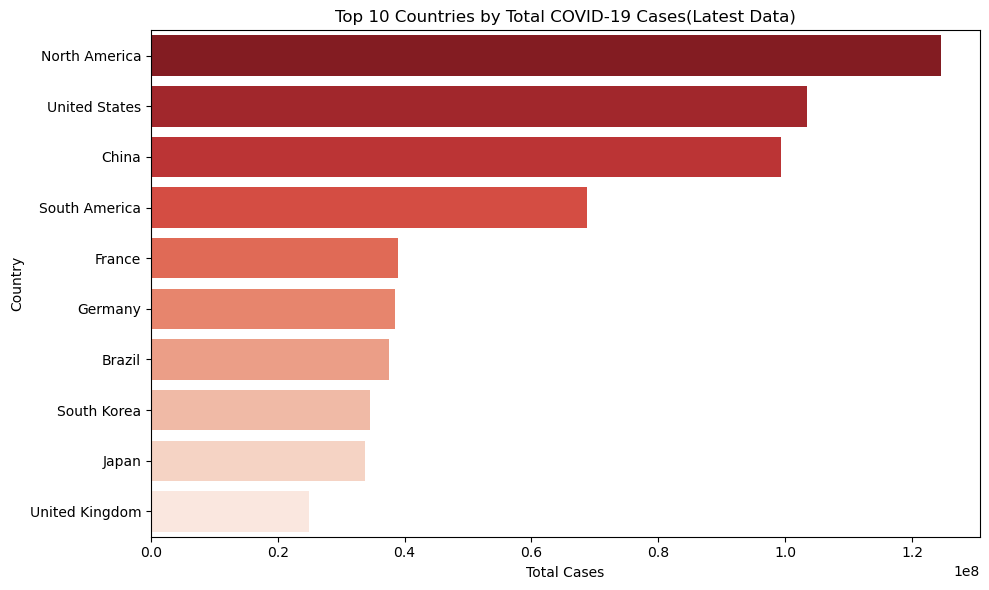

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
df['date']=pd.to_datetime(df['date'])


# Get latest data per country
latest = df.sort_values('date').groupby('location').tail(1)

# Drop rows without total cases
latest = latest.dropna(subset=['total_cases'])

# Get top 10 countries by total cases
top_countries = latest.sort_values('total_cases',ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries,x='total_cases',y='location',palette='Reds_r')

plt.title('Top 10 Countries by Total COVID-19 Cases(Latest Data)')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()





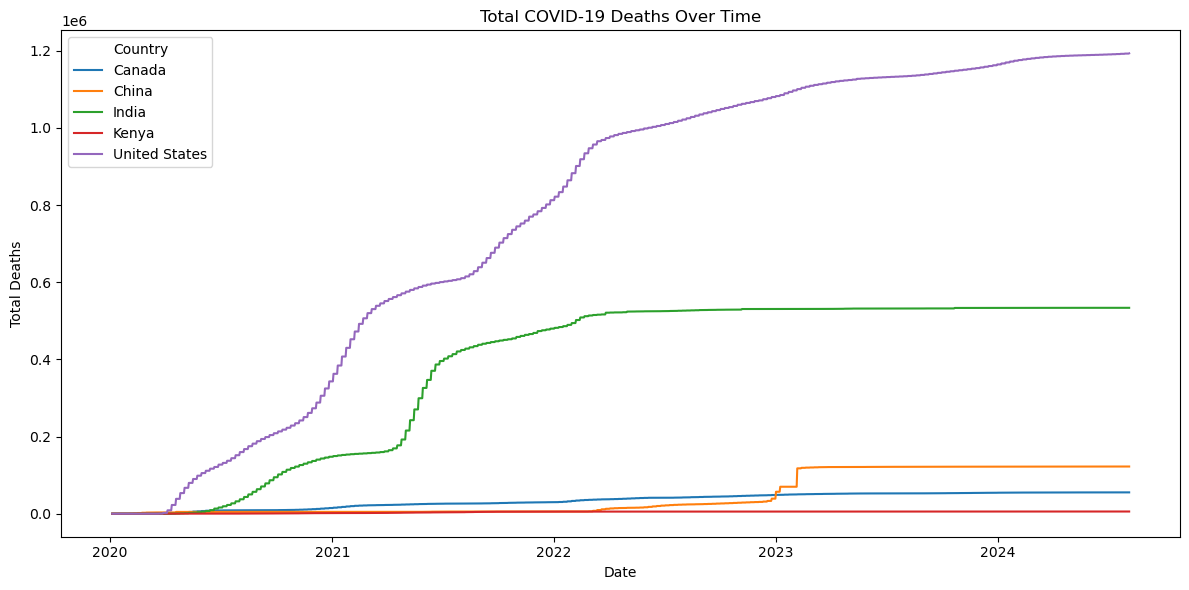

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
df['date']=pd.to_datetime(df['date'])

# Filter selected countries
countries_of_interest = ['Kenya', 'United States', 'China', 'India', 'Canada']
filtered_df = df[df['location'].isin(countries_of_interest)]

# Drop rows with missing total_deaths
filtered = filtered.dropna(subset=['total_deaths'])

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x='date', y='total_deaths', hue='location')

# Add labels
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

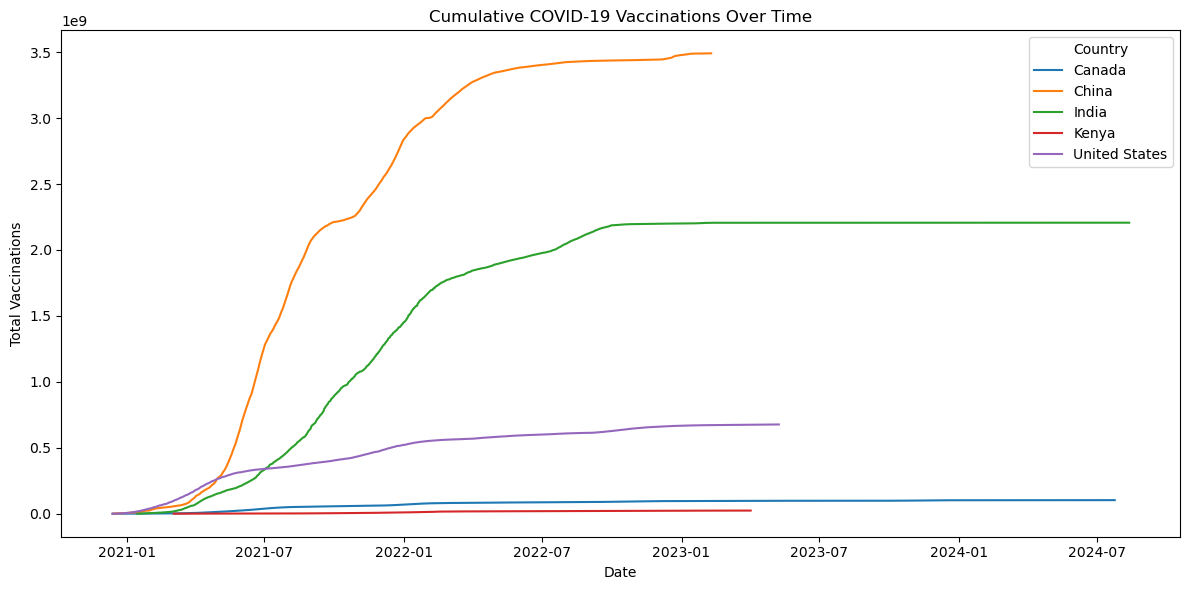

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
df['date']=pd.to_datetime(df['date'])

# Filter selected countries
countries = ['Kenya', 'United States', 'China', 'India', 'Canada']
filtered = df[df['location'].isin(countries)]

# Drop rows with missing total vaccinations
filtered = filtered.dropna(subset=['total_vaccinations'])

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x='date', y='total_vaccinations', hue='location')

# Add labels
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

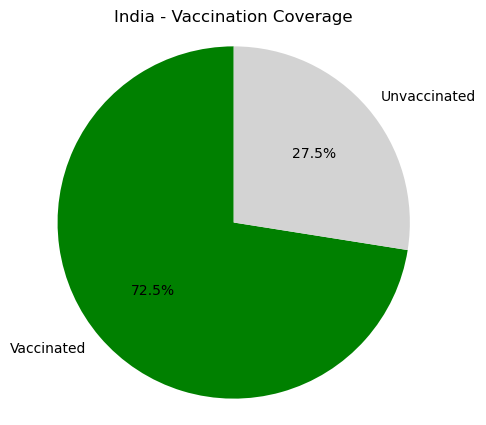

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
df['date']=pd.to_datetime(df['date'])

# Filter selected countries
countries = ['Kenya', 'United States', 'China', 'India', 'Canada']
latest = df.sort_values('date').groupby('location').tail(1)
latest = latest[latest['location'].isin(countries)]

# Drop rows with missing values
latest = latest.dropna(subset=['people_vaccinated','population'])

# Plot pie charts
for _, row in latest.iterrows():
    vaccinated_pct = (row['people_vaccinated']/row['population']) * 100
    unvaccinated_pct = 100 - vaccinated_pct
    labels = ['Vaccinated', 'Unvaccinated']
    sizes = [vaccinated_pct, unvaccinated_pct]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green','lightgray'])
plt.title(f"{row['location']} - Vaccination Coverage")
plt.axis('equal')
plt.show()


Key insights from the data
1. United States has the highest number of total cases and death.
2. India has a higher percentage of vaccinated people than unvaccinated.
3. Many countries experienced steady increases in total cases and deaths.
4. China and India have much higher percentages of vaccinated populations than Kenya.

Anomalies and Interesting Patterns 
1. Countries like India and United States show sudden spikes in vaccination numbers during certain months, most likely due to mass vaccination.
2. Kenya's vaccination rates remain low despite increase in COVID 19 cases.
3. Some countries show periods where total cases flatten, which could reflect effective lockdowns or temporary control of outbreaks.